<a href="https://colab.research.google.com/github/Radhe-0/Generadores/blob/main/Generador_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ \text{Generador de datos para practicar modelado de machine learning} $


# Generadores


In [1]:
!git clone https://github.com/Radhe-0/Generadores.git

Cloning into 'Generadores'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 90 (delta 51), reused 36 (delta 17), pack-reused 0
Unpacking objects: 100% (90/90), done.


In [2]:
%cd Generadores

/content/Generadores


**Para generar datos sólo tienes que llamar a una función**

In [4]:
# Primero importamos el módulo
from Generadores import *

In [6]:
# Ejemplo
datos = DatosClusters3D()
datos

[(88.27746117621959, 50.27746117621959, 69.27746117621959),
 (9.80211645607263, 79.80211645607262, 2.80211645607263),
 (21.631832967468313, 7.631832967468313, 81.63183296746831),
 (2.66918680293995, 65.66918680293995, 43.66918680293995),
 (69.11464613258534, 93.11464613258534, 14.114646132585337),
 (87.12783393850248, 46.12783393850247, 19.12783393850247),
 (50.83257030548392, 64.83257030548393, 43.83257030548392),
 (43.800172757410856, 40.800172757410856, 60.800172757410856),
 (89.28864404802977, 1.2886440480297605, 6.28864404802976),
 (89.72708555019773, 6.727085550197725, 94.72708555019773)]

# Ejemplos

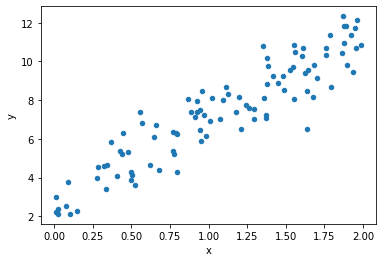

In [7]:
datos = DatosLineales(100)
data_frame = pd.DataFrame(datos, columns=['x', 'y'])
data_frame.plot.scatter(x='x', y='y')

**Útil para:**


*   Regresiones lineales
*   Máquinas de soporte vectorial


---




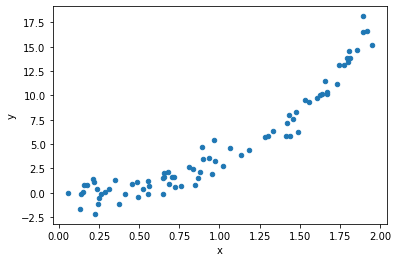

In [8]:
datos = DatosNoLineales(80)
data_frame = pd.DataFrame(datos, columns=['x', 'y'])
data_frame.plot.scatter(x='x', y='y')

**Útil para:**


*   Regresiones polinómicas
*   Máquinas de soporte vectorial


---



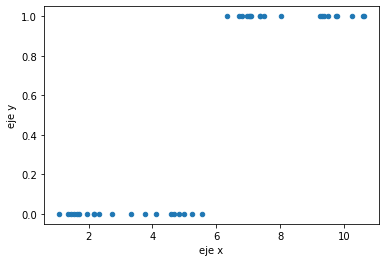

In [9]:
datos = DatosLRegression(20)
data_frame = pd.DataFrame(datos, columns=['eje x', 'eje y'])
data_frame.plot.scatter(x='eje x', y='eje y')

**Útil para:**


*   Regresión logística


---



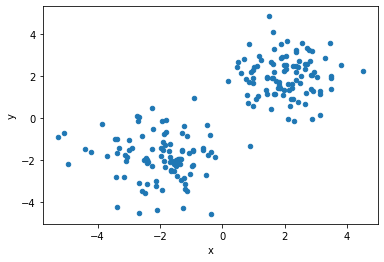

In [10]:
datos = DatosSVM(50)
data_frame = pd.DataFrame(datos, columns=['x', 'y'])
data_frame.plot.scatter(x='x', y='y')

**Útil para:**


*   Máquinas de vectores de soporte
*   K vecinos más cercanos


---

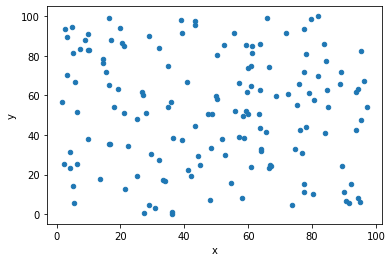

In [11]:
datos = DatosClusters(150)
data_frame = pd.DataFrame(datos, columns=['x', 'y'])
data_frame.plot.scatter(x='x', y='y')

**Útil para:**

*   K means clustering
*   K vecinos más cercanos
*   Árboles de decisión
*   Bosques aleatorios
*   Hierarchical clustering

---

# Aplicaciones a modelos de Machine Learning

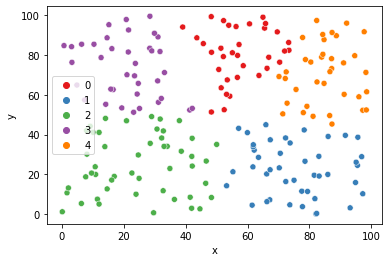

In [12]:
# Para KMeans Clustering

# Importamos las librerías (también usaremos numpy y pandas)
from sklearn.cluster import KMeans
import seaborn as sns

# Cargamos los datos
datos = DatosClusters(200)
df = pd.DataFrame(datos, columns=['x', 'y'])

# Transformamos los datos en un array de numpy (dos formas)
# NOTA: Son arrays 2D de (150, 2)
datos_transformados = df.to_numpy() # Primera forma: A través de un dataframe
datos_transformados = np.asarray(datos) # Segunda forma: A través de una lista

# Modelamos
modelo = KMeans(n_clusters=5) # Creamos el modelo
modelo.fit(datos_transformados) # Entrenamos el modelo
predicciones = modelo.predict(datos_transformados) # Hacemos las predicciones

# Graficamos
sns.scatterplot(x='x', y='y', data=df, hue=predicciones, palette='Set1')

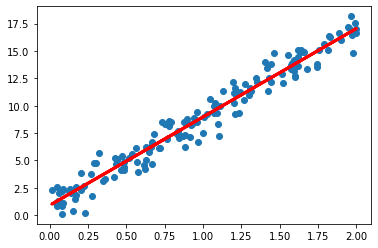

In [13]:
# Para regresión lineal

# Importamos las librerías (También usaremos numpy y pandas)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargamos los datos
datos = DatosLineales(150)
df = pd.DataFrame(datos, columns=['x', 'y'])

# Separamos los datos y los convertimos en arrays
X = df['x'].to_numpy().reshape(-1,1) # Es un array 2D de (150,1)
Y = df['y'].to_numpy() # Es un array 1D de (150,)

# Modelamos
modelo = LinearRegression()
modelo.fit(X,Y)
predicciones = modelo.predict(X) # Hacemos las predicciones

# Graficamos
plt.scatter(x=X,y=Y) # Estos son los puntos azules
plt.plot(X, predicciones, color='red', linewidth=3) # Esta es la línea roja

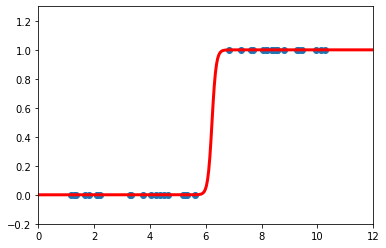

In [14]:
# Para regresión logística

# Importamos las librerías (también usaremos numpy y pandas)
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import matplotlib.pyplot as plt


# Cargamos los datos
datos = DatosLRegression(20)
df = pd.DataFrame(datos, columns=['x', 'y'])


# Transformamos los datos en arrays
X = df['x'].to_numpy().reshape(-1,1) # Es un array 2D de (40,1)
Y = df['y'].to_numpy() # Es un array 1D de (40,)
X += 0.3 * np.random.normal(size=40).reshape(-1,1)

# Modelamos
modelo = LogisticRegression(C=1e5)
modelo.fit(X,Y)


# Graficamos
X_test = np.linspace(0,12,300)
loss = expit(X_test * modelo.coef_ + modelo.intercept_).ravel()

plt.scatter(X,Y)
plt.plot(X_test, loss, color='red', linewidth=3)
plt.ylim(-0.2, 1.3)
plt.xlim(0, 12)
plt.show()